In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
train = pd.read_csv('train.csv', parse_dates=['DateTime'])
new_col_names = list(train.columns)
new_col_names[new_col_names.index('AnimalID')] = 'ID'
train.columns = new_col_names

test = pd.read_csv('test.csv', parse_dates=['DateTime'])
animals = pd.concat([train, test], ignore_index=True)
print('Training dataset shape:', train.shape)
print('Testing dataset shape:', test.shape)
print('Full dataset shape:', animals.shape)

Training dataset shape: (26729, 10)
Testing dataset shape: (11456, 8)
Full dataset shape: (38185, 10)


/Users/Kairat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [216]:
# First look at data
animals.head()

,AgeuponOutcome,AnimalType,Breed,Color,DateTime,ID,Name,OutcomeSubtype,OutcomeType,SexuponOutcome
0,1 year,Dog,Shetland Sheepdog Mix,Brown/White,2014-02-12 18:22:00,A671945,Hambone,NaN,Return_to_owner,Neutered Male
1,1 year,Cat,Domestic Shorthair Mix,Cream Tabby,2013-10-13 12:44:00,A656520,Emily,Suffering,Euthanasia,Spayed Female
2,2 years,Dog,Pit Bull Mix,Blue/White,2015-01-31 12:28:00,A686464,Pearce,Foster,Adoption,Neutered Male
3,3 weeks,Cat,Domestic Shorthair Mix,Blue Cream,2014-07-11 19:09:00,A683430,NaN,Partner,Transfer,Intact Male
4,2 years,Dog,Lhasa Apso/Miniature Poodle,Tan,2013-11-15 12:52:00,A667013,NaN,Partner,Transfer,Neutered Male


In [217]:
animals.tail()

,AgeuponOutcome,AnimalType,Breed,Color,DateTime,ID,Name,OutcomeSubtype,OutcomeType,SexuponOutcome
38180,2 months,Cat,Domestic Shorthair Mix,Black,2014-07-08 14:50:00,11452,NaN,NaN,NaN,Neutered Male
38181,2 weeks,Cat,Domestic Shorthair Mix,Blue,2014-10-21 12:57:00,11453,NaN,NaN,NaN,Intact Female
38182,1 year,Cat,Domestic Shorthair Mix,Calico,2014-09-29 09:00:00,11454,NaN,NaN,NaN,Intact Female
38183,6 years,Dog,German Shepherd Mix,Black/Tan,2015-09-05 17:16:00,11455,Rambo,NaN,NaN,Neutered Male
38184,4 years,Dog,Labrador Retriever,Cream,2014-07-12 18:40:00,11456,Gusto,NaN,NaN,Intact Male


In [218]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 10 columns):
AgeuponOutcome    38161 non-null object
AnimalType        38185 non-null object
Breed             38185 non-null object
Color             38185 non-null object
DateTime          38185 non-null datetime64[ns]
ID                38185 non-null object
Name              27269 non-null object
OutcomeSubtype    13117 non-null object
OutcomeType       26729 non-null object
SexuponOutcome    38184 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 2.9+ MB


In [219]:
animals['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years', '22 years'],
      dtype=object)

In [220]:
# Let's inspect each variable one by one.
# AnimalType. Let's see what types of animals are fostered here.
animals['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [221]:
animals['AnimalType'] = animals['AnimalType'].astype('category')
animals['AnimalType'].dtype

CategoricalDtype(categories=['Cat', 'Dog'], ordered=False)

In [222]:
# AgeuponOutcome. It should really be a numeric column.
# Let's convert the values to some base unit - weeks.

def convertToWeeks(age):
    age = str(age).replace('s', '')
    age_vals = age.split()
    if len(age_vals) != 2:
        return np.nan
    
    num = int(age.split()[0])
    unit = age.split()[1]
    
    if unit == 'day':
        return 0
    elif unit == 'week':
        return num
    elif unit == 'month':
        return num * 4
    elif unit == 'year':
        return num * 52
    else:
        return np.nan

animals['AgeInWeeks'] = animals['AgeuponOutcome'].apply(convertToWeeks)

In [223]:
# Convert to days.
def convertToDays(age):
    age = str(age).replace('s', '')
    age_vals = age.split()
    if len(age_vals) != 2:
        return np.nan
    
    num = int(age.split()[0])
    unit = age.split()[1]
    
    if unit == 'day':
        return num
    elif unit == 'week':
        return num*7
    elif unit == 'month':
        return num * 30
    elif unit == 'year':
        return num * 365
    else:
        return np.nan

animals['AgeInDays'] = animals['AgeuponOutcome'].apply(convertToDays)

In [224]:
# Let's see how many different breeds we have here (for cats and dogs separately)
cats = animals[animals['AnimalType'] == 'Cat']
dogs = animals[animals['AnimalType'] == 'Dog']

print('Number of breeds for cats: ', len(cats['Breed'].unique()))
print('Number of breeds for dogs: ', len(dogs['Breed'].unique()))

Number of breeds for cats:  70
Number of breeds for dogs:  1608


In [225]:
# The number of dog breeds is more than the number of cat breeds by an order of magnitude. 
# We may want to categorize the breeds in some custom way to make the number of categories smaller.
cats['Breed'].unique()

array(['Domestic Shorthair Mix', 'Angora Mix', 'Russian Blue Mix',
       'Domestic Longhair Mix', 'Domestic Longhair', 'Siamese Mix',
       'Domestic Medium Hair Mix', 'Manx Mix', 'Domestic Shorthair',
       'Exotic Shorthair Mix', 'Devon Rex Mix', 'Snowshoe Mix',
       'Maine Coon Mix', 'Burmese', 'Domestic Medium Hair', 'Bengal Mix',
       'American Shorthair Mix', 'Himalayan Mix', 'Ragdoll Mix',
       'Snowshoe/Ragdoll', 'Siamese', 'Domestic Medium Hair/Siamese',
       'Bombay Mix', 'Persian Mix', 'Siamese/Domestic Shorthair',
       'Domestic Shorthair/Manx', 'Bengal', 'Cornish Rex Mix',
       'Balinese Mix', 'Javanese Mix', 'British Shorthair',
       'Japanese Bobtail Mix', 'British Shorthair Mix',
       'Pixiebob Shorthair Mix', 'Tonkinese Mix', 'Sphynx',
       'Manx/Domestic Shorthair', 'Domestic Longhair/Persian',
       'Ocicat Mix', 'Abyssinian Mix', 'Munchkin Longhair Mix',
       'Domestic Longhair/Rex', 'Maine Coon', 'Himalayan',
       'Turkish Van Mix', 'Domes

In [226]:
dogs['Breed'].unique()[:60]

array(['Shetland Sheepdog Mix', 'Pit Bull Mix',
       'Lhasa Apso/Miniature Poodle', 'Cairn Terrier/Chihuahua Shorthair',
       'American Pit Bull Terrier Mix', 'Cairn Terrier',
       'Miniature Schnauzer Mix', 'Yorkshire Terrier Mix',
       'Great Pyrenees Mix', 'Flat Coat Retriever Mix',
       'Queensland Heeler Mix', 'Plott Hound/Boxer',
       'German Shepherd Mix', 'American Staffordshire Terrier Mix',
       'Chihuahua Shorthair Mix', 'Labrador Retriever Mix',
       'Collie Smooth/German Shepherd', 'Beagle',
       'Pit Bull/Labrador Retriever', 'Blue Lacy Mix',
       'Black Mouth Cur Mix', 'Dachshund/Beagle', 'Dachshund Mix',
       'Maltese Mix', 'Pointer Mix', 'English Foxhound', 'Vizsla Mix',
       'German Shepherd/Great Pyrenees',
       'Cardigan Welsh Corgi/Chihuahua Shorthair', 'Chow Chow/Pit Bull',
       'Chihuahua Shorthair', 'Plott Hound Mix', 'Boxer/Great Dane',
       'Lhasa Apso', 'Beagle/Treeing Walker Coonhound',
       'Border Collie Mix', 'Border Terrie

In [227]:
# We see a lot of "Mix" and "/" (which also means the animals is a mix of breeds).
# We can classify the cats by breed purity and derive primary and secondary breeds.
def isPure(breed):
    breed = breed.lower()
    return ('mix' not in breed) and ('/' not in breed)
    
animals['PureBreed'] = animals['Breed'].apply(isPure)

In [228]:
# Let's see how many pure-breeds and mixes are in our data set.
animals['PureBreed'].value_counts()

False    36199
True      1986
Name: PureBreed, dtype: int64

In [229]:
# Now let's derive primary and secondary breeds
def getPrimaryBreed(breed):
    return breed.replace('Mix', '').split('/')[0].strip()

def getSecondaryBreed(breed):
    if '/' in breed:
        return breed.split('/')[1].strip()
    else:
        return ''
    
animals['PrimaryBreed'] = animals['Breed'].apply(getPrimaryBreed)
animals['SecondaryBreed'] = animals['Breed'].apply(getSecondaryBreed)

In [230]:
animals['Color'].unique()

array(['Brown/White', 'Cream Tabby', 'Blue/White', 'Blue Cream', 'Tan',
       'Black/Tan', 'Blue Tabby', 'Brown Tabby', 'Red/White', 'White',
       'Black', 'Silver', 'Brown', 'Black/Red', 'White/Cream',
       'Orange Tabby/White', 'Black/White', 'Brown Brindle/White',
       'Black/Brown', 'Orange Tabby', 'Chocolate/White', 'White/Tan',
       'Cream Tabby/White', 'Blue', 'Calico', 'Torbie', 'Brown/Black',
       'Yellow', 'Tricolor', 'White/Black', 'Tortie', 'Blue Tabby/White',
       'Gray/White', 'Tan/Black', 'Tan/White', 'Buff',
       'Brown Tabby/White', 'Red', 'Blue/Tan', 'Seal Point',
       'Brown Brindle', 'White/Brown', 'Gray', 'Yellow Brindle/White',
       'Fawn/White', 'Flame Point', 'Black Tabby/White', 'Tortie/Calico',
       'Black/Brown Brindle', 'White/Gray', 'Tan/Silver',
       'Red Tick/Black', 'White/Cream Tabby', 'Blue Merle',
       'Chocolate/Tan', 'Sable', 'Brown Merle/White', 'Brown Tiger/White',
       'Liver/White', 'White/Blue Tabby', 'Black/Gray', 'C

In [231]:
# We have a lot of items that are combined colors, for example Brown Tiger/White.
# But rather than extracting primary and secondary colors, 
# let's just categorize colors by whether it's a mix or not.

animals['ColorMix'] = animals['Color'].apply(lambda s: '/' in s)

In [232]:
# DateTime looks good. Nothing much meaningful we can do with Name and ID.

In [233]:
# OutcomeType and OutcomeSubtype have nan as a category. 
# This is because the columns didn't exist in the testing data set in the first place,
# and got added after concatenation.
# In other cases - there are missing values in OutcomeSubtype in the training data set.
# We can leave them as they are for now.

animals['OutcomeType'] = animals['OutcomeType'].astype('category')
animals['OutcomeSubtype'] = animals['OutcomeSubtype'].astype('category')
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 16 columns):
AgeuponOutcome    38161 non-null object
AnimalType        38185 non-null category
Breed             38185 non-null object
Color             38185 non-null object
DateTime          38185 non-null datetime64[ns]
ID                38185 non-null object
Name              27269 non-null object
OutcomeSubtype    13117 non-null category
OutcomeType       26729 non-null category
SexuponOutcome    38184 non-null object
AgeInWeeks        38161 non-null float64
AgeInDays         38161 non-null float64
PureBreed         38185 non-null bool
PrimaryBreed      38185 non-null object
SecondaryBreed    38185 non-null object
ColorMix          38185 non-null bool
dtypes: bool(2), category(3), datetime64[ns](1), float64(2), object(8)
memory usage: 3.4+ MB


In [234]:
# Lastly, SexuponOutcome
animals['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [235]:
# We can categorize the animals further by Sex and Neutering
def getSexCategory(sex):
    if sex in ['Neutered Male', 'Intact Male']:
        return 1
    elif sex in ['Spayed Female', 'Intact Female']:
        return 0
    else:
        return 'Unknown'
    
def getNeuteringCategory(sex):
    if sex in ['Neutered Male', 'Spayed Female']:
        return 1
    elif sex in ['Intact Male', 'Intact Female']:
        return 0
    else:
        return 'Unknown'
    
animals['Sex'] = animals['SexuponOutcome'].apply(getSexCategory).astype('category')
animals['Neutered'] = animals['SexuponOutcome'].apply(getNeuteringCategory).astype('category')

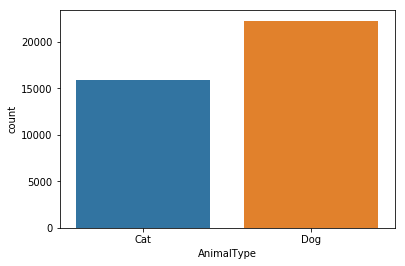

In [236]:
# Now the data set looks clean. Let's start visualizing.
# Again, we'll do each variable one by one and draw simple univariate graphs 
# and then move to more complicated relationships.
ax = sns.countplot('AnimalType', data=animals)

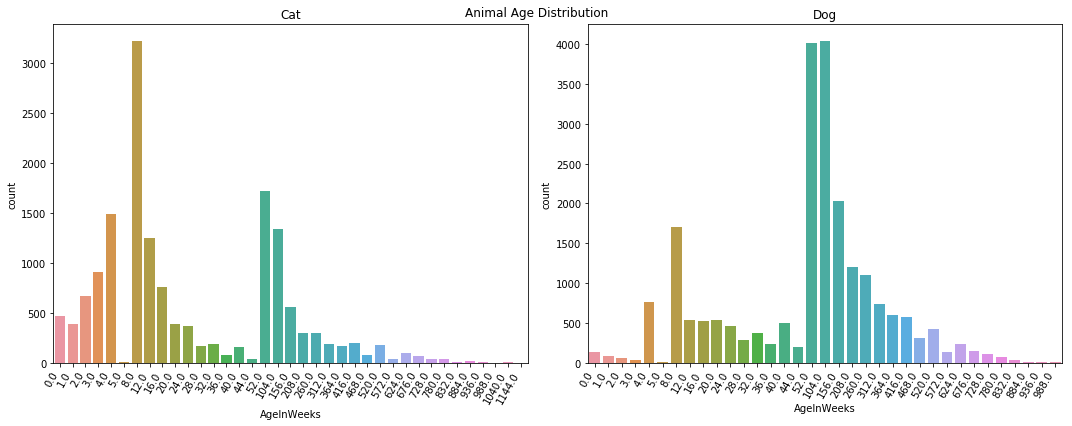

In [237]:
cats = animals[animals['AnimalType'] == 'Cat']
dogs = animals[animals['AnimalType'] == 'Dog']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.countplot('AgeInWeeks', data=cats, ax=ax1)
sns.countplot('AgeInWeeks', data=dogs, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax1.set_title('Cat')
ax2.set_title('Dog')
fig.suptitle('Animal Age Distribution')
fig.tight_layout()

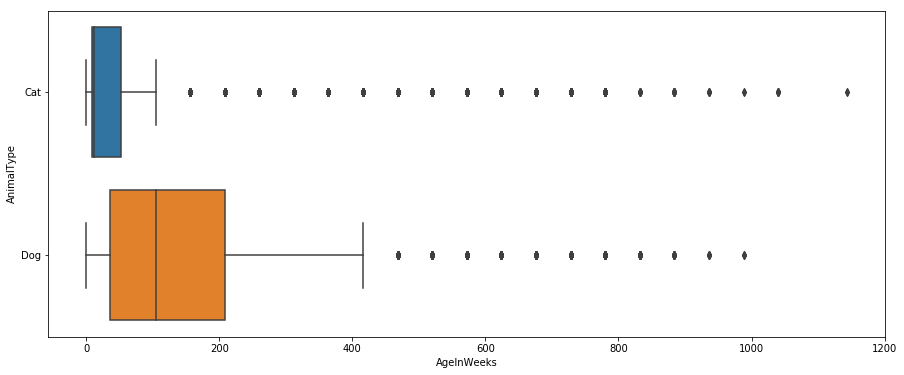

In [238]:
ax = sns.boxplot('AgeInWeeks', 'AnimalType', data=animals, orient='h')
ax.figure.set_size_inches(15,6)

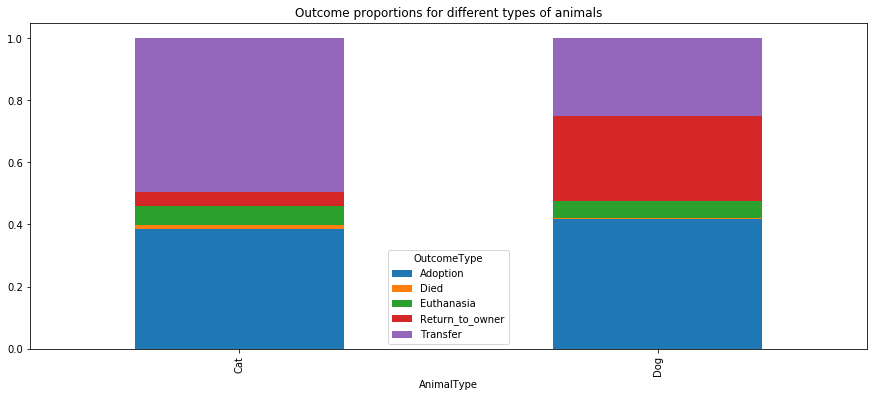

In [239]:
(animals.groupby(['AnimalType', 'OutcomeType']).
        size().
        unstack().
        transform(lambda x: x/x.sum(), axis=1).
        plot(kind='bar', stacked=True, figsize=(15,6), title='Outcome proportions for different types of animals'))

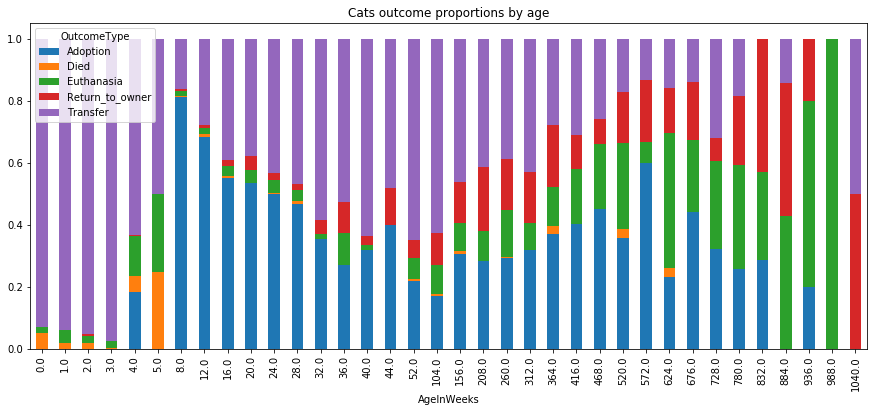

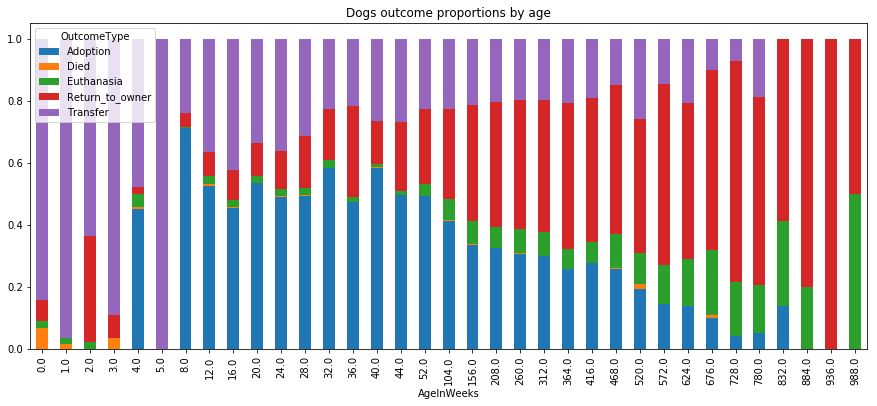

In [240]:
# Let's take a closer look at the outcome proportions by age
(cats.groupby(['AgeInWeeks', 'OutcomeType']).
        size().
        unstack().
        transform(lambda x: x/x.sum(),  axis=1).
        plot(kind='bar', stacked=True, figsize=(15, 6), title='Cats outcome proportions by age'))

(dogs.groupby(['AgeInWeeks', 'OutcomeType']).
        size().
        unstack().
        transform(lambda x: x/x.sum(),  axis=1).
        plot(kind='bar', stacked=True, figsize=(15, 6), title='Dogs outcome proportions by age'))

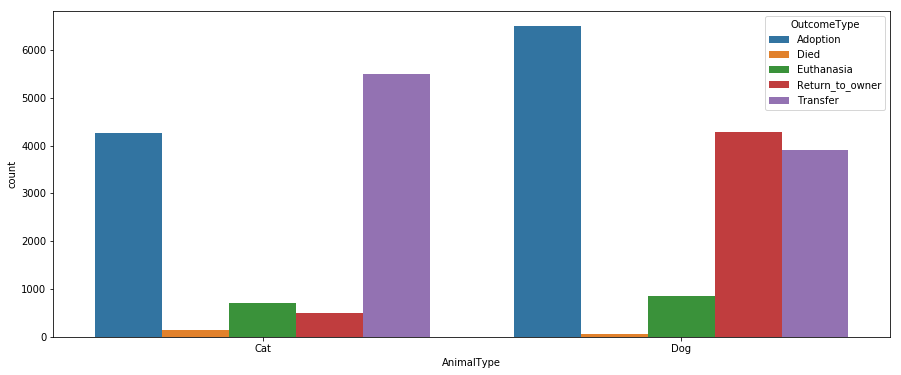

In [241]:
# Animals tend to get euthanized more as they get older.
# Also, they tend to be returned to owners as they get older.

# Let's look at different outcomes groupped by animal type
ax = sns.countplot('AnimalType', hue='OutcomeType', data=animals)
ax.figure.set_size_inches(15,6)

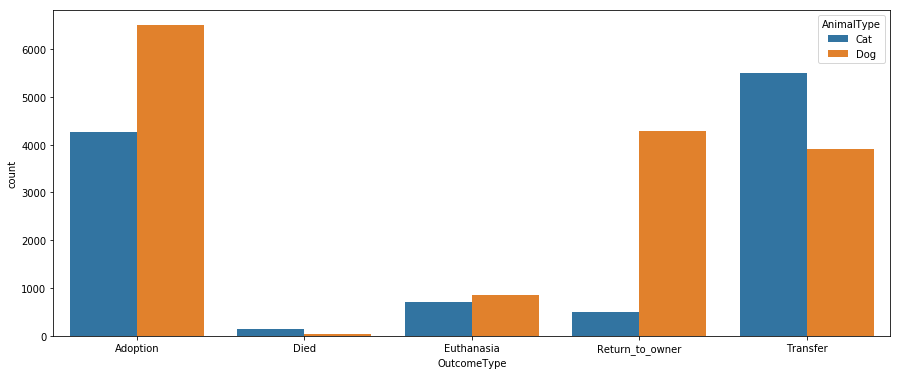

In [242]:
# Animal type outcomes grouped by outcome type
ax = sns.countplot('OutcomeType', hue='AnimalType', data=animals)
ax.figure.set_size_inches(15,6)

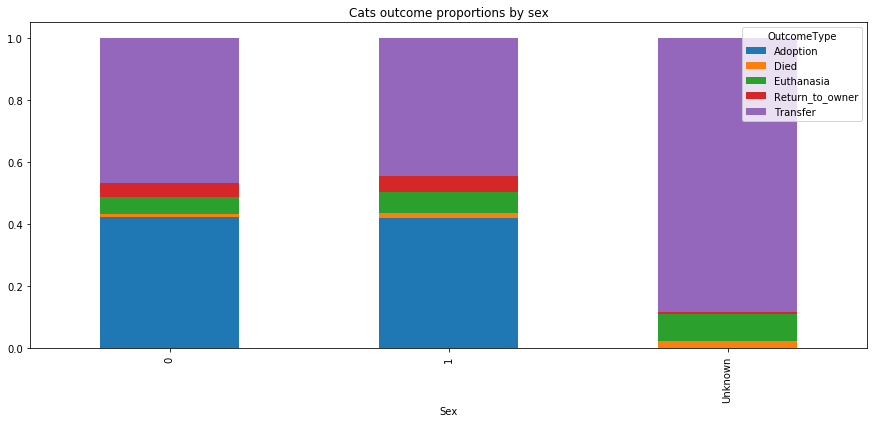

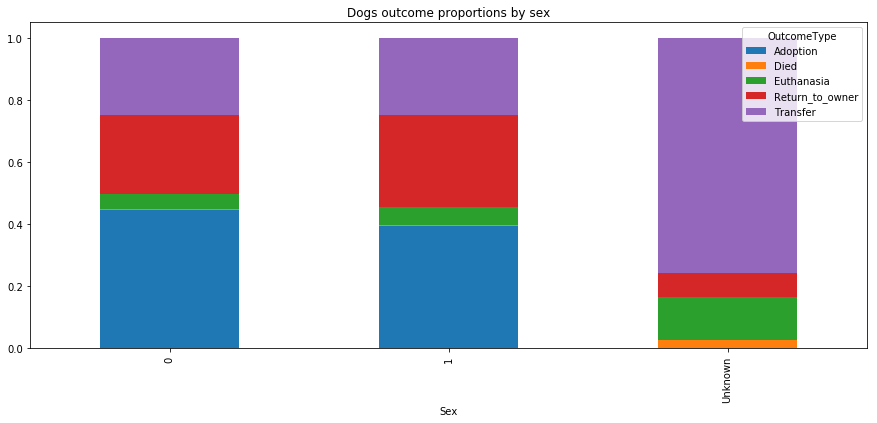

In [243]:
# Looks like proportions of outcomes isn't different for different sexes of animals
(cats.groupby(['Sex', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Cats outcome proportions by sex'))

(dogs.groupby(['Sex', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Dogs outcome proportions by sex'))

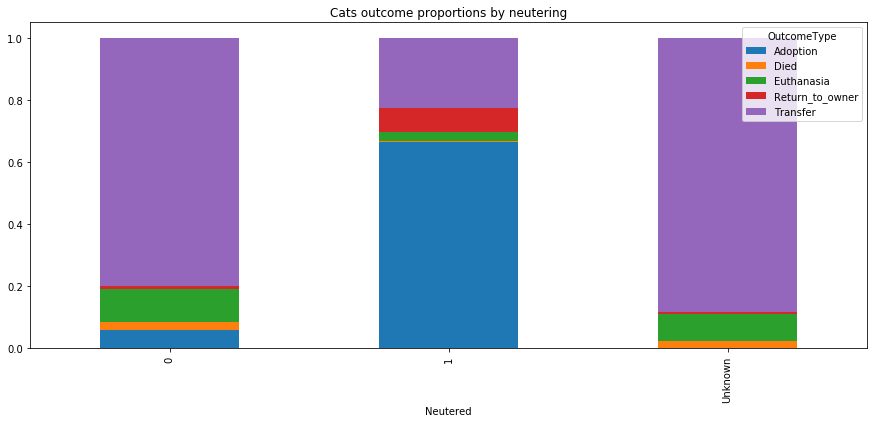

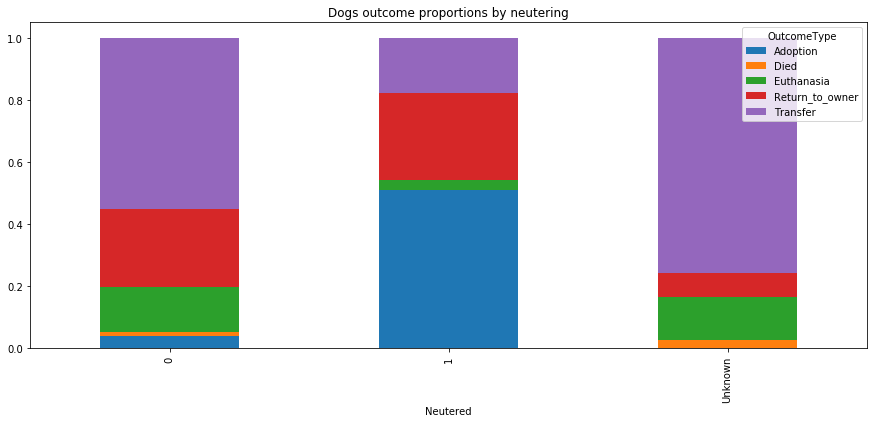

In [244]:
# Now let's look at outcome proportions by neutering for both cats and dogs
(cats.groupby(['Neutered', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Cats outcome proportions by neutering'))

(dogs.groupby(['Neutered', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Dogs outcome proportions by neutering'))

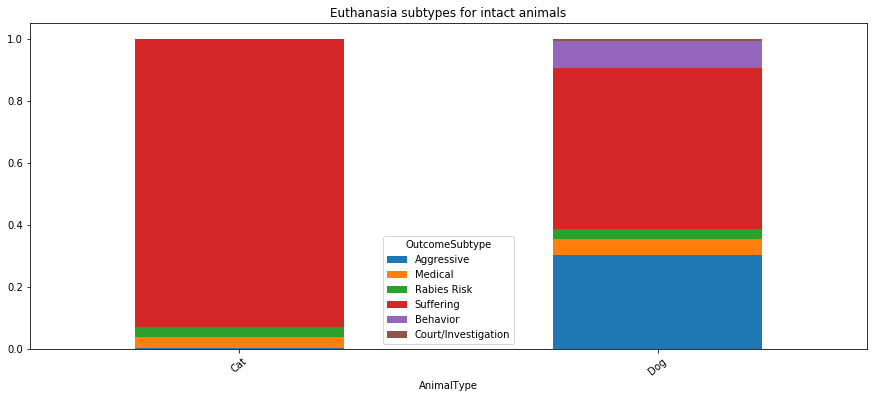

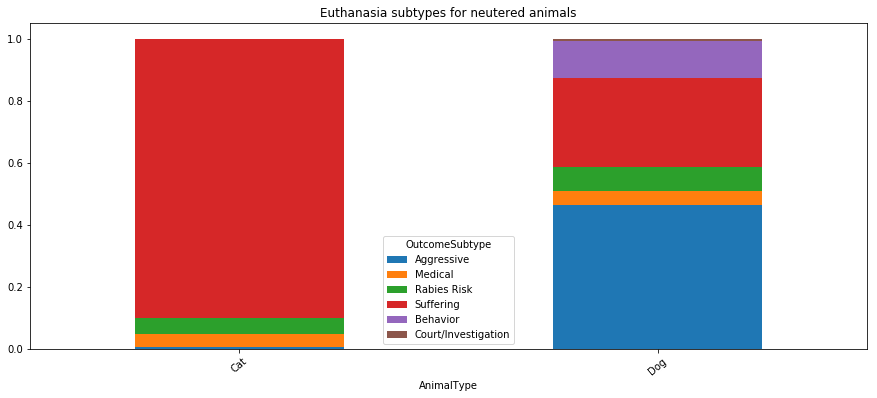

In [245]:
# Interesting! Neutered animals get adopted more and euthanized less.
# Let's look at different outcome subtypes to see if they are any different for intact and neutered animals
intact_euthanized = animals[(animals['Neutered'] == 0) & (animals['OutcomeType'] == 'Euthanasia')]
(intact_euthanized.groupby(['AnimalType', 'OutcomeSubtype']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Euthanasia subtypes for intact animals', rot=40))

neutered_euthanized = animals[(animals['Neutered'] == 1) & (animals['OutcomeType'] == 'Euthanasia')]
(neutered_euthanized.groupby(['AnimalType', 'OutcomeSubtype']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Euthanasia subtypes for neutered animals', rot=40))

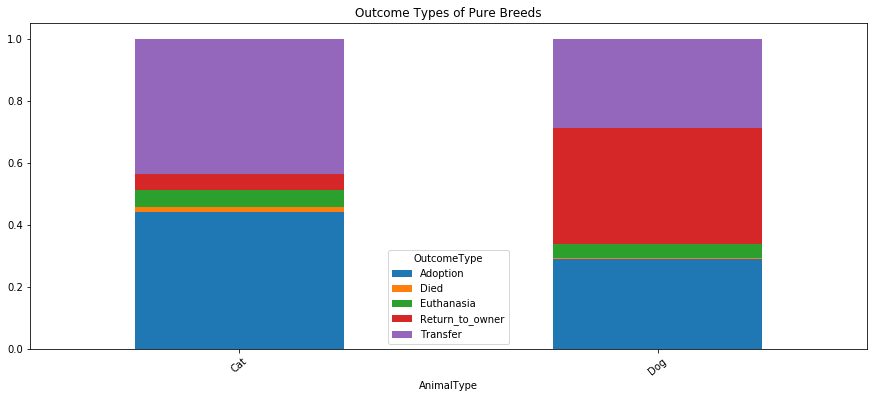

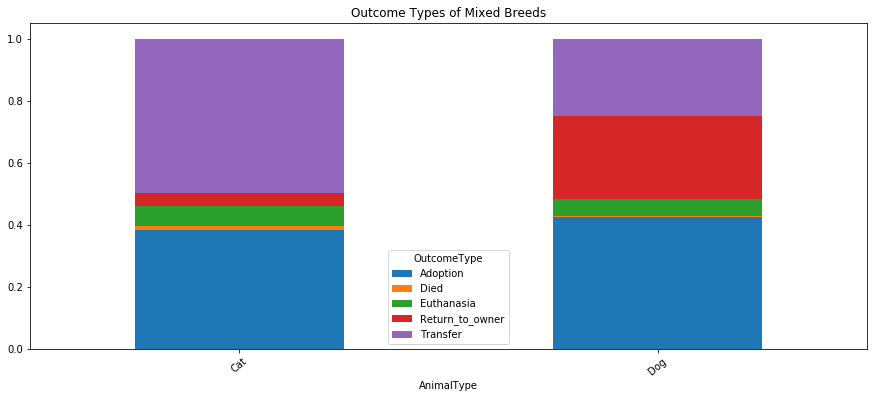

In [246]:
# Euthanasia outcome subtypes are not really that different between neutered and intact cats. 
# However, there's a slight difference in euthanasia outcome subtypes for neutered and intact dogs.
# There's more euthanized neutered dogs that are aggressive and more euthanized intact dogs that are suffering.

# Let's see if breed purity affects the outcome.

pure = animals[animals['PureBreed'] == True]
mixed = animals[animals['PureBreed'] == False]

(pure.groupby(['AnimalType', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Outcome Types of Pure Breeds', rot=40))

(mixed.groupby(['AnimalType', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Outcome Types of Mixed Breeds', rot=40))

Text(0, 0.5, 'Breed')

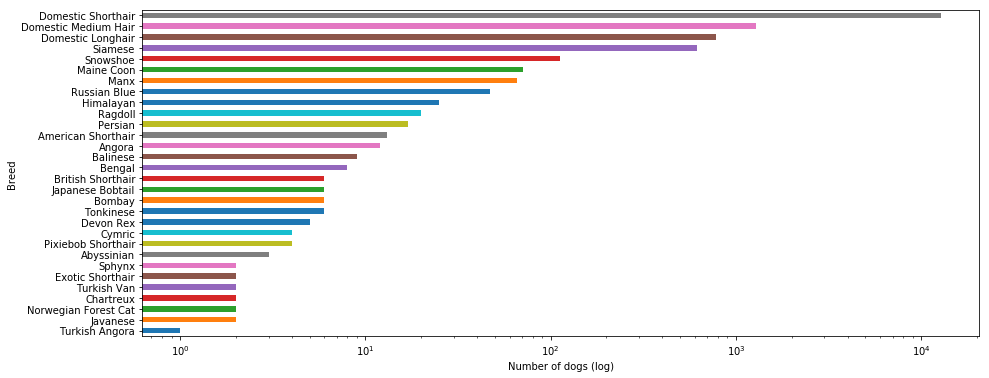

In [247]:
# Not much difference overall. Mixed dogs get adopted more and pure breed dogs get returned to their owners more, 
# which is good either way.

# Let's take a look at Breed distributions for both cats...
ax = (animals[animals['AnimalType'] == 'Cat']['PrimaryBreed'].
     value_counts().
     head(30).
     sort_values().
     plot(kind='barh', figsize=(15,6), logx=True, ))
ax.set_xlabel('Number of dogs (log)')
ax.set_ylabel('Breed')

Text(0, 0.5, 'Breed')

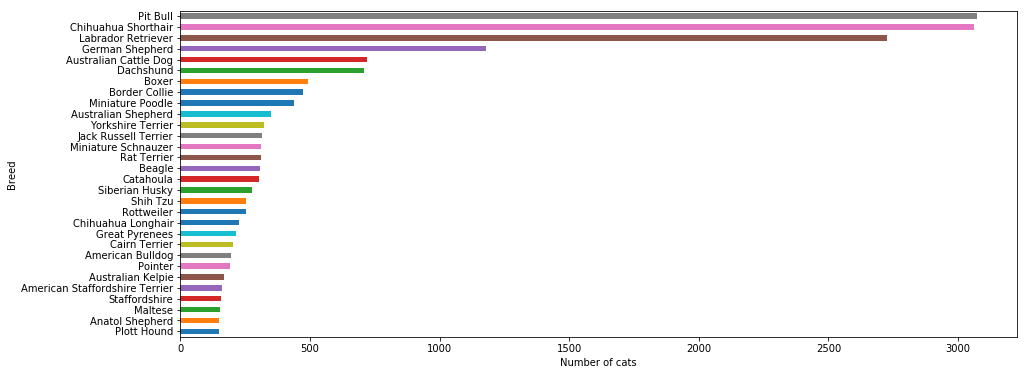

In [248]:
# ... and dogs.
ax = (animals[animals['AnimalType'] == 'Dog']['PrimaryBreed'].
     value_counts().
     head(30).
     sort_values().
     plot(kind='barh', figsize=(15,6), logx=False))
ax.set_xlabel('Number of cats')
ax.set_ylabel('Breed')

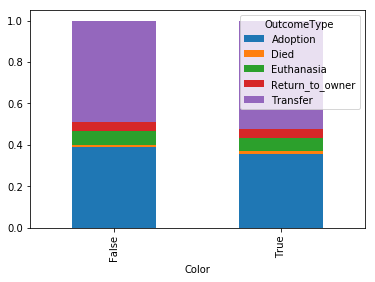

In [249]:
# Are black cats get neglected?
(cats.groupby([cats['Color'] == 'Black', 'OutcomeType']).
     size().
     unstack().
     transform(lambda x: x/x.sum(), axis=1).
     plot(kind='bar', stacked=True))

In [250]:
# Looks like no major difference in outcomes for black cats.

# Now there's the DateTime property that we can extract lots of information from. Let's do just that.
animals['Weekday'] = animals['DateTime'].dt.weekday
animals['Hour'] = animals['DateTime'].dt.hour

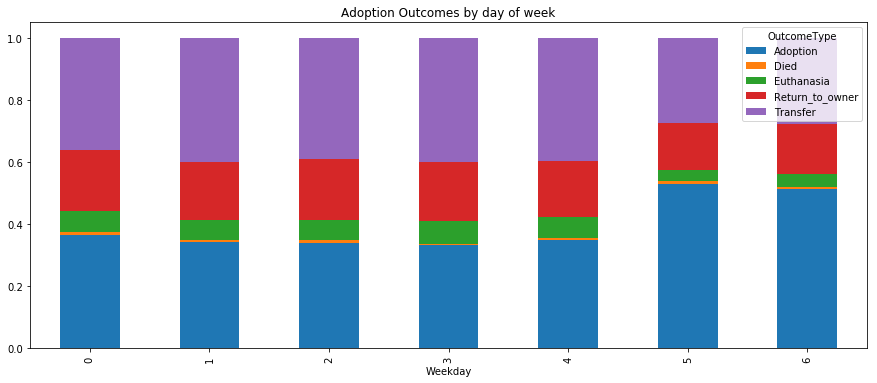

In [251]:
(animals.groupby(['Weekday', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15, 6), title='Adoption Outcomes by day of week'))

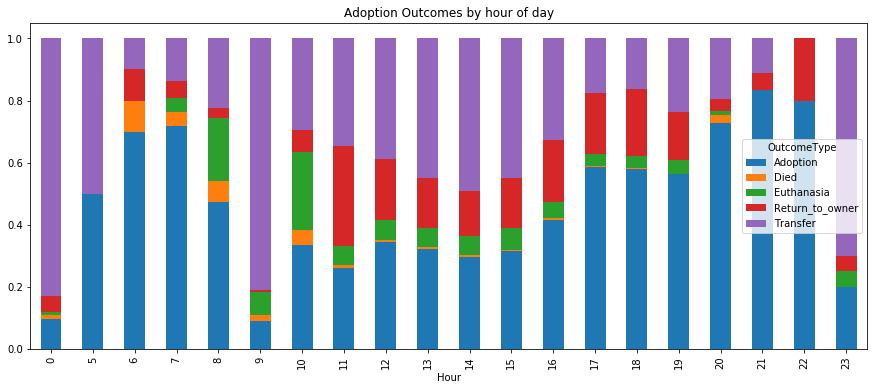

In [252]:
# More adoptions happen on weekends, which makes sense - everyone's busy during the workdays.
(animals.groupby(['Hour', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15, 6), title='Adoption Outcomes by hour of day'))

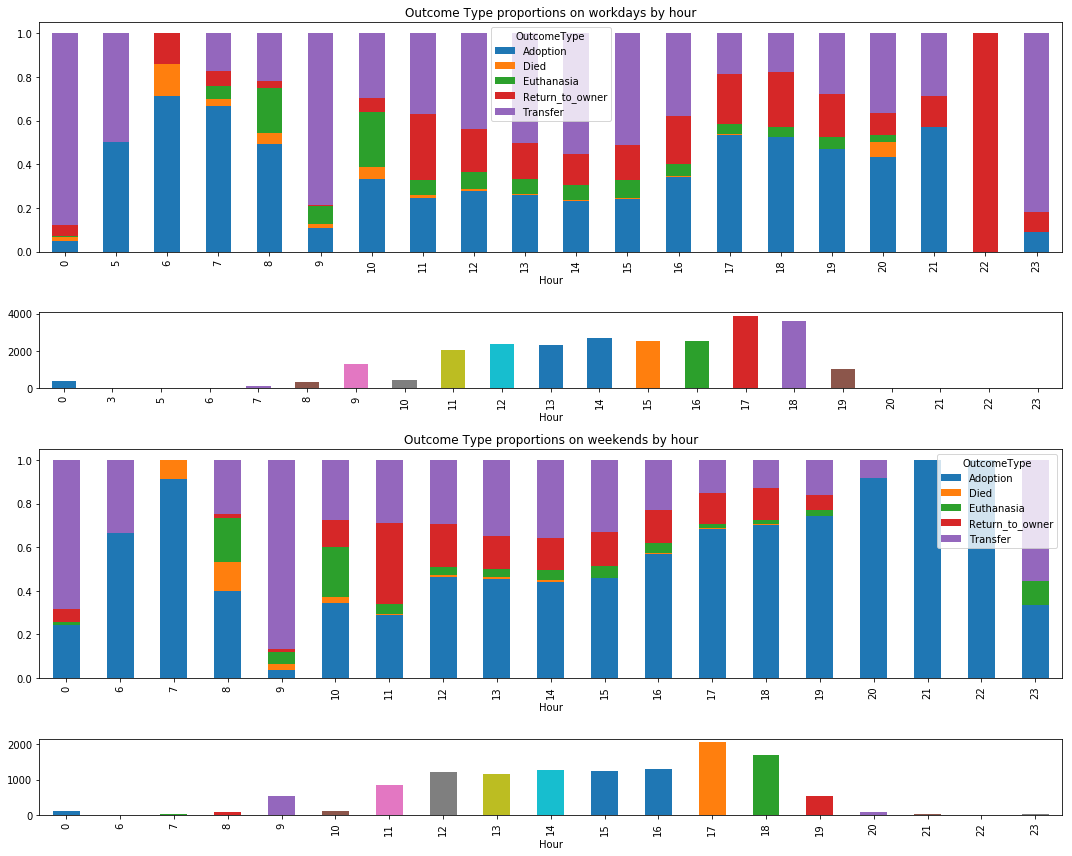

In [253]:
# During the day, adoptions are mostly either in the morning or evening. 
# Most of euthanasia happens either at 8 or 10am.
# Animals get returned to their owners late in the morning till evenings.
# Interestingly, there are certain definitive hours dedicated for transfer: 12am, 9am and 11pm.

# Let's see if weekend hours differ from those of workdays.
animals['Weekend'] = animals['Weekday'].apply(lambda d: 1 if d == 5 or d == 6 else 0)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), gridspec_kw = {'height_ratios':[3, 1, 3, 1]})
(animals[animals['Weekend'] == 0].groupby(['Hour', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, ax=ax1, title='Outcome Type proportions on workdays by hour'))

(animals[animals['Weekend'] == 0].groupby('Hour').size().plot(kind='bar', ax=ax2))

(animals[animals['Weekend'] == 1].groupby(['Hour', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, ax=ax3, title='Outcome Type proportions on weekends by hour'))

(animals[animals['Weekend'] == 1].groupby('Hour').size().plot(kind='bar', ax=ax4))
plt.tight_layout()

In [254]:
# The Outcome patterns on weekends are a little different from those of workdays.
# We see that adoptions happen more often in the afternoon than they would on workdays. 
# Also, seems like there's an adoption spree from 8pm through 10pm on weekends.
# The proportions look interesting, but we need to look at the outcome distribution as well to the a clear picture.
# It's clear that there's almost no activity during the above-mentioned times, so there's no strong correlation.
# From the distributions we see that most activities happen from 9am to 7pm.

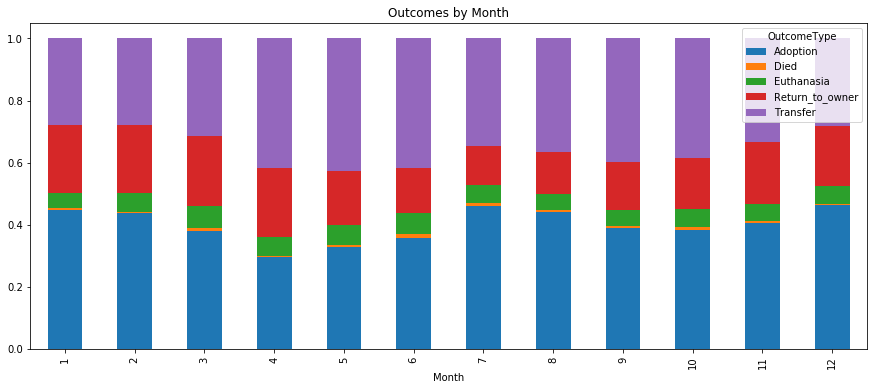

In [255]:
animals['Month'] = animals['DateTime'].dt.month
(animals.groupby(['Month', 'OutcomeType']).
    size().
    unstack().
    transform(lambda x: x/x.sum(), axis=1).
    plot(kind='bar', stacked=True, figsize=(15,6), title='Outcomes by Month'))

In [256]:
# Let's get to modeling. 
# For this classification task we're going to use Random Forest.

In [257]:
animals.head()

,AgeuponOutcome,AnimalType,Breed,Color,DateTime,ID,Name,OutcomeSubtype,OutcomeType,SexuponOutcome,...,PureBreed,PrimaryBreed,SecondaryBreed,ColorMix,Sex,Neutered,Weekday,Hour,Weekend,Month
0,1 year,Dog,Shetland Sheepdog Mix,Brown/White,2014-02-12 18:22:00,A671945,Hambone,NaN,Return_to_owner,Neutered Male,...,False,Shetland Sheepdog,,True,1,1,2,18,0,2
1,1 year,Cat,Domestic Shorthair Mix,Cream Tabby,2013-10-13 12:44:00,A656520,Emily,Suffering,Euthanasia,Spayed Female,...,False,Domestic Shorthair,,False,0,1,6,12,1,10
2,2 years,Dog,Pit Bull Mix,Blue/White,2015-01-31 12:28:00,A686464,Pearce,Foster,Adoption,Neutered Male,...,False,Pit Bull,,True,1,1,5,12,1,1
3,3 weeks,Cat,Domestic Shorthair Mix,Blue Cream,2014-07-11 19:09:00,A683430,NaN,Partner,Transfer,Intact Male,...,False,Domestic Shorthair,,False,1,0,4,19,0,7
4,2 years,Dog,Lhasa Apso/Miniature Poodle,Tan,2013-11-15 12:52:00,A667013,NaN,Partner,Transfer,Neutered Male,...,False,Lhasa Apso,Miniature Poodle,False,1,1,4,12,0,11


In [258]:
from sklearn.tree import DecisionTreeClassifier
X = pd.get_dummies(animals[['AnimalType', 'Sex', 'Neutered', 'PureBreed', 'ColorMix']])
X_train = X[animals['AgeInWeeks'].notnull()]
y_train = animals[animals['AgeInWeeks'].notnull()]['AgeInWeeks']

X_test = X[animals['AgeInWeeks'].isnull()]

model = DecisionTreeClassifier().fit(X_train, y_train)
y_test = model.predict(X_test)

In [259]:
animals.loc[animals['AgeInWeeks'].isnull(), 'AgeInWeeks'] = y_test

In [260]:
X = pd.get_dummies(animals[['AnimalType', 'Sex', 'Neutered', 'PureBreed', 'ColorMix']])
X_train = X[animals['AgeInDays'].notnull()]
y_train = animals[animals['AgeInDays'].notnull()]['AgeInDays']

X_test = X[animals['AgeInDays'].isnull()]

model = DecisionTreeClassifier().fit(X_train, y_train)
y_test = model.predict(X_test)

animals.loc[animals['AgeInDays'].isnull(), 'AgeInDays'] = y_test

In [269]:
columns = ['AnimalType', 'Neutered', 'AgeInWeeks',
           'PureBreed', 'ColorMix', 'Sex',
           'Weekday', 'Weekend', 'Hour', 'Month']
X = pd.get_dummies(animals[columns], drop_first=True)
X_train = X.iloc[:train.shape[0]]
y_train = animals.iloc[:train.shape[0]]['OutcomeType']
X_test = X.iloc[train.shape[0]:]

In [270]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=600).fit(X_train, y_train)

In [271]:
model.feature_importances_

array([0.11413172, 0.12337548, 0.01150421, 0.02892454, 0.10286901,
       0.01052178, 0.20571518, 0.19722865, 0.03198662, 0.13645186,
       0.00470861, 0.0280526 , 0.00452974])

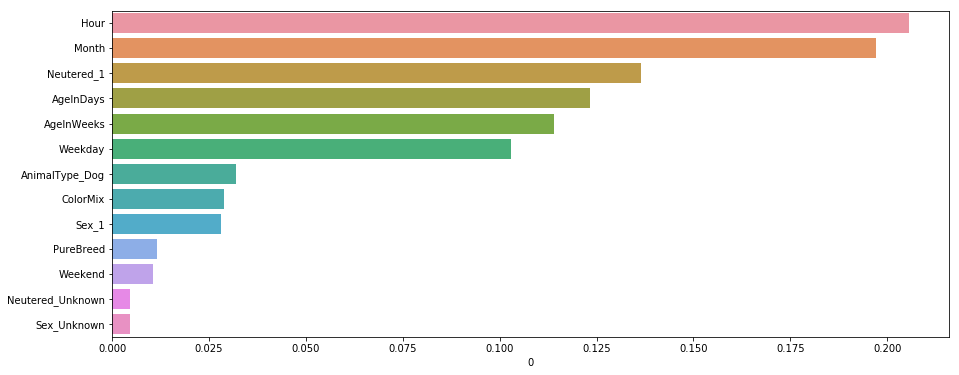

In [272]:
df = pd.DataFrame(model.feature_importances_, index=X_train.columns)
ax = sns.barplot(df[0], df.index, orient='h', order=df[0].sort_values(ascending=False).index)
ax.figure.set_size_inches(15,6)

In [273]:
y_test = model.predict(X_test)
result_df = pd.DataFrame(y_test)
result_df.head()

,0
0,Transfer
1,Adoption
2,Return_to_owner
3,Transfer
4,Adoption


In [274]:
submission = pd.get_dummies(result_df)
submission.columns = list(animals['OutcomeType'].cat.categories)
submission.index = np.arange(1, submission.shape[0]+1)
submission.index.rename('ID', inplace=True)
submission.to_csv('submit.csv')

In [275]:
y_test_proba = model.predict_proba(X_test)
result_proba_df = pd.DataFrame(y_test_proba)
result_proba_df.head()

,0,1,2,3,4
0,0.026667,0.000000,0.188333,0.071667,0.713333
1,0.735963,0.155000,0.000000,0.102787,0.006250
2,0.235139,0.000000,0.008333,0.661667,0.094861
3,0.081250,0.006667,0.113333,0.120000,0.678750
4,0.814769,0.000000,0.001667,0.169028,0.014537


In [276]:
result_proba_df.to_csv('result_proba.csv')